CNN  
CIFAR-10 데이터셋을 활용하여 다음의 변형을 각자 선택하세요.

변형 1(김상협): 더 많은 컨볼루션  레이어 & 풀링 레이어 추가  
변형 2(정지윤): 다른 활성화 함수 사용 (예: LeakyReLU, ELU)  
#1\. 개별구현 - 변형 3(박병준): 다른 최적화 알고리즘 사용 (예: SGD, Adam, RMSprop)  

결과 분석  
nadam>adam>adamax>rmsprop>sgd>adagrad>adadelta  
adam Test accuracy: 0.6984000205993652  
sgd Test accuracy: 0.5945000052452087  
adagrad Test accuracy: 0.4284000098705292  
rmsprop Test accuracy: 0.6898000240325928  
adadelta Test accuracy: 0.21480000019073486  
nadam Test accuracy: 0.7031999826431274  
adamax Test accuracy: 0.6927000284194946

##Adam

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

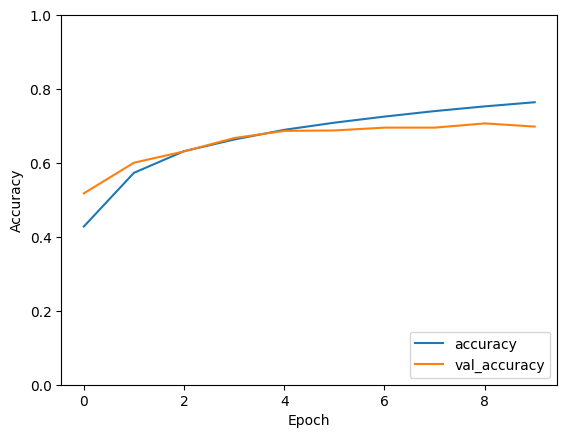

313/313 - 4s - loss: 0.9084 - accuracy: 0.6984 - 4s/epoch - 14ms/step

Test accuracy: 0.6984000205993652


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# from__logits=true: 모델 출력이 활성화함수를 거치지 않은 로짓 값. 이 경우 loss func은 내부적으로 softmax 적용 후 실제 loss 계산(softmax와 crossentropy 결합 시 생기는 문제 해결)

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 1s 602ms/step


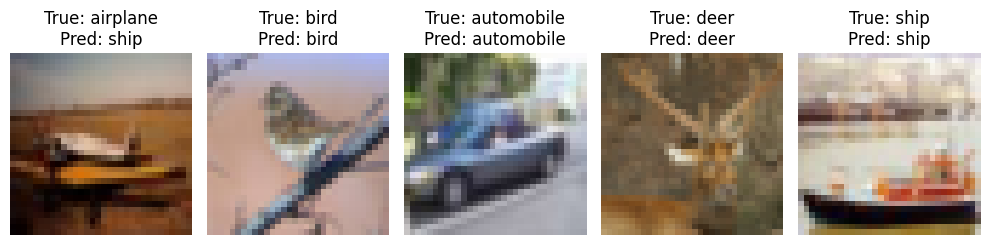

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

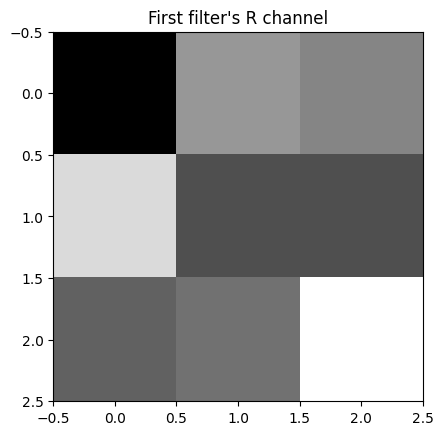

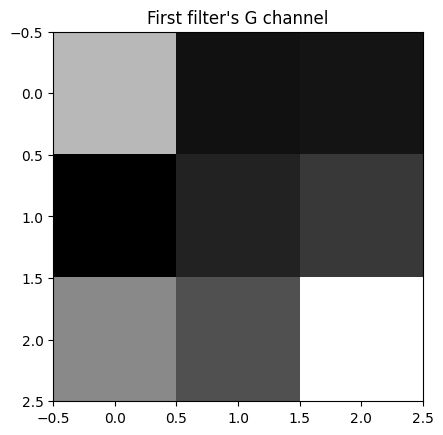

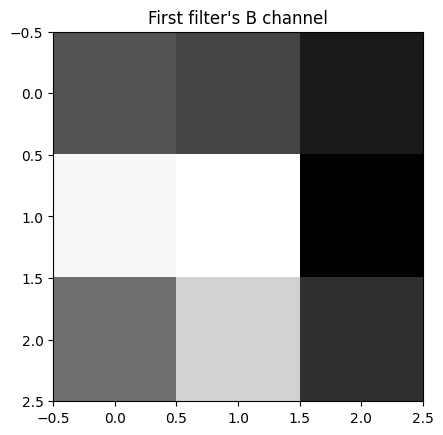

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##SGD

Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 2.0829 - accuracy: 0.2284 - val_loss: 2.0030 - val_accuracy: 0.2861
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7654 - accuracy: 0.3611 - val_loss: 1.6169 - val_accuracy: 0.4198
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5572 - accuracy: 0.4376 - val_loss: 1.5091 - val_accuracy: 0.4438
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4361 - accuracy: 0.4808 - val_loss: 1.3797 - val_accuracy: 0.5002
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3519 - accuracy: 0.5155 - val_loss: 1.4075 - val_accuracy: 0.4890
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2827 - accuracy: 0.5442 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2196 - accuracy: 0.5689 - val_loss: 1.3373 - val_accurac

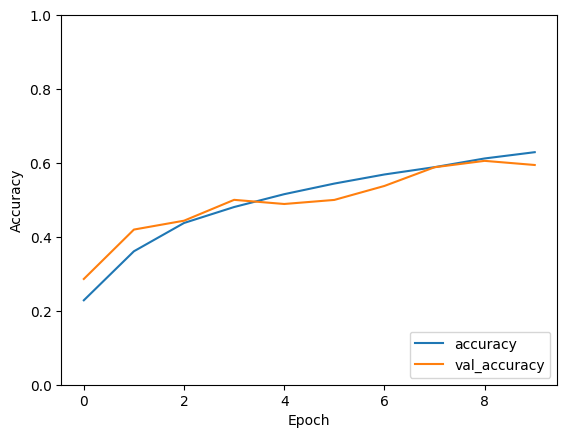

313/313 - 1s - loss: 1.1750 - accuracy: 0.5945 - 671ms/epoch - 2ms/step

Test accuracy: 0.5945000052452087


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                      validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 1s 695ms/step


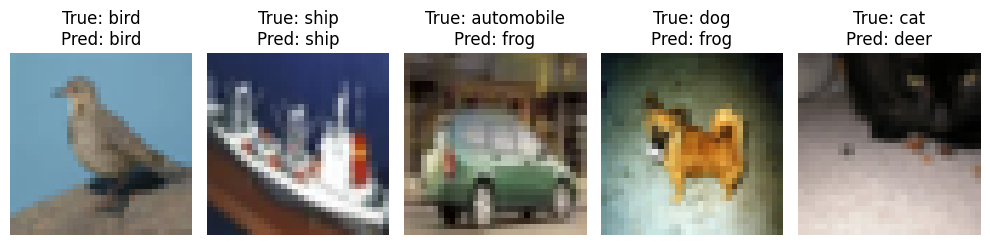

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

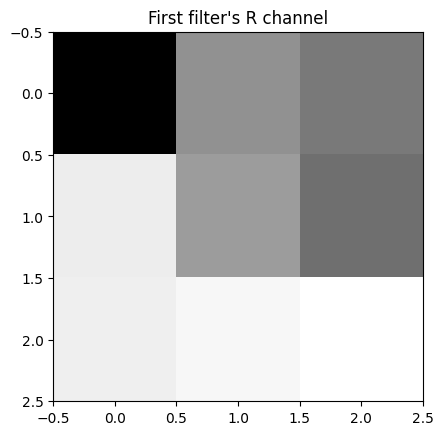

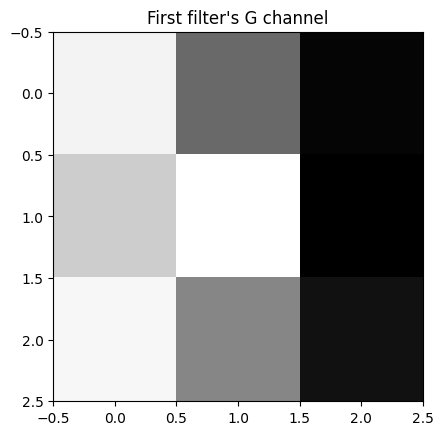

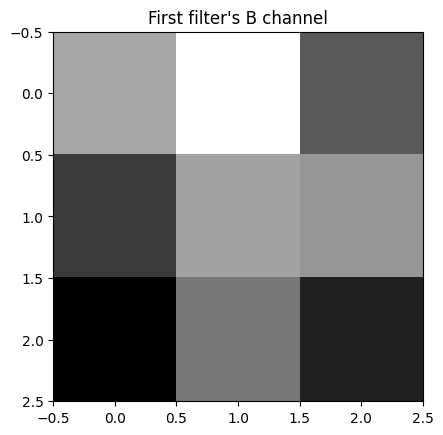

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##Adagrad

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

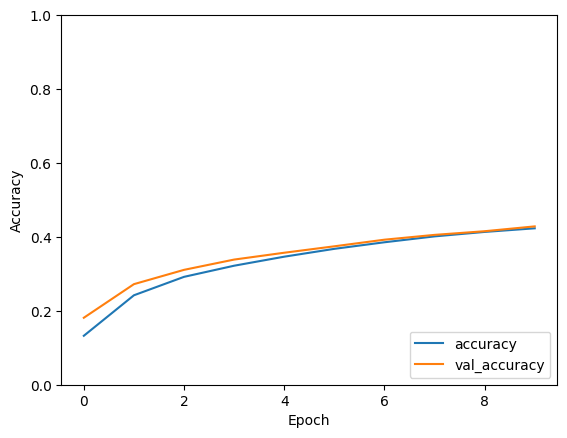

313/313 - 1s - loss: 1.6029 - accuracy: 0.4284 - 674ms/epoch - 2ms/step

Test accuracy: 0.4284000098705292


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 72ms/step


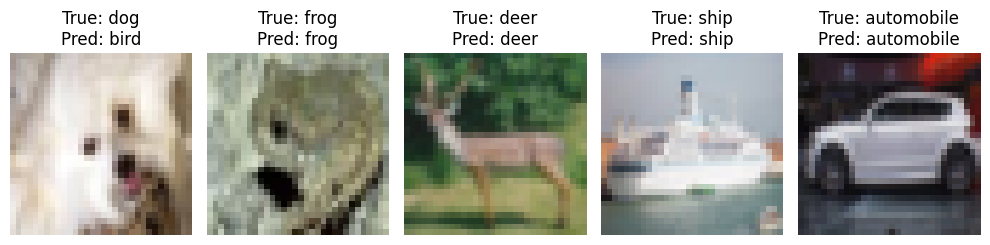

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

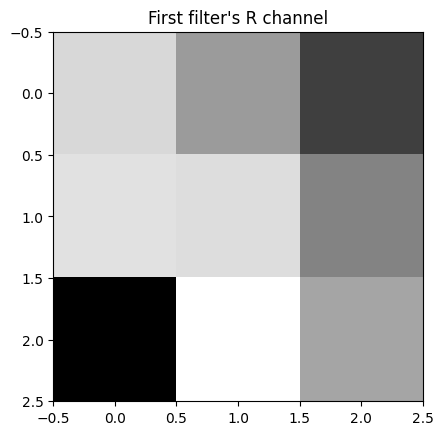

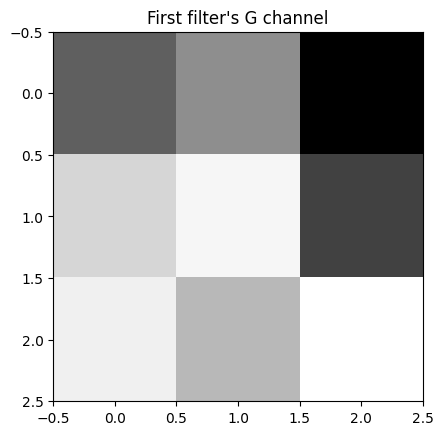

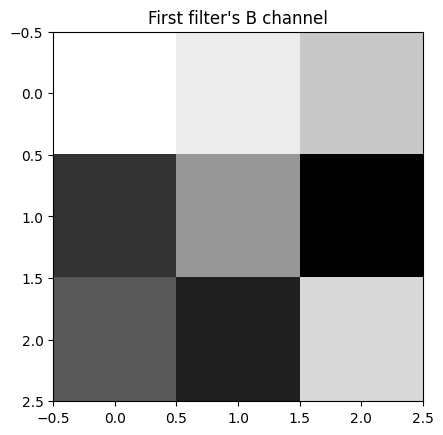

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##RMSprop

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

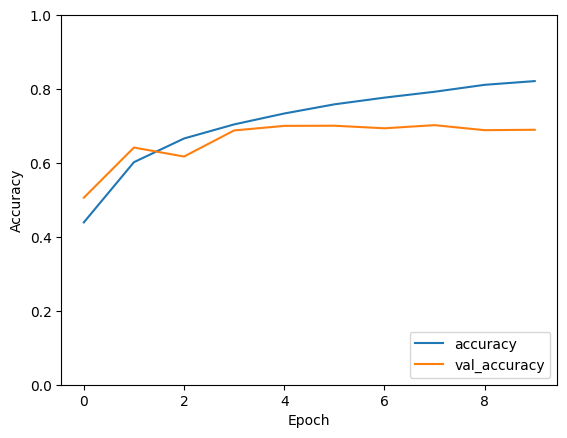

313/313 - 1s - loss: 1.1144 - accuracy: 0.6898 - 699ms/epoch - 2ms/step

Test accuracy: 0.6898000240325928


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 74ms/step


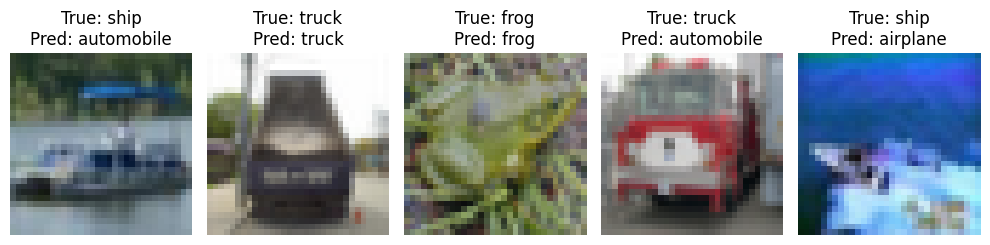

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

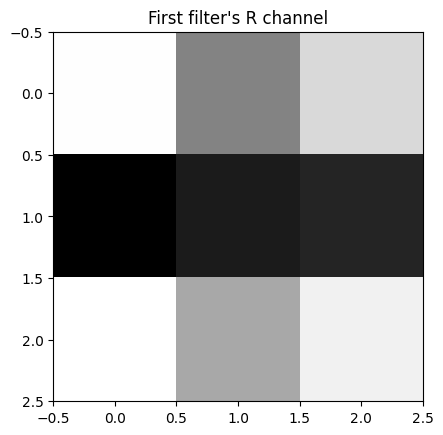

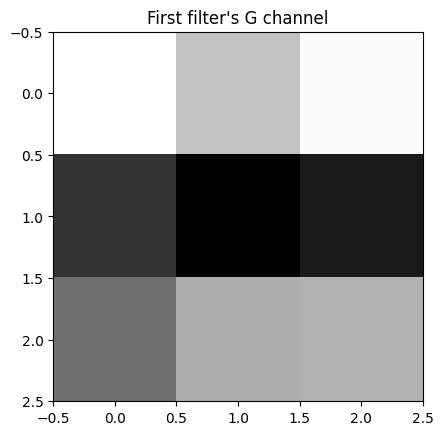

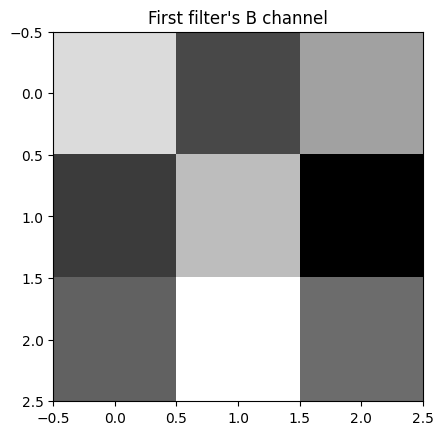

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##Adadelta

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

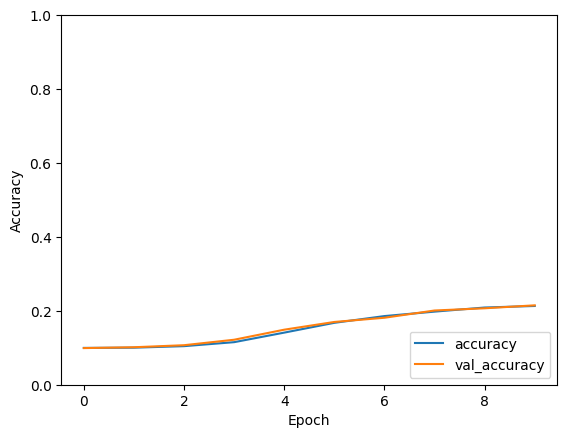

313/313 - 1s - loss: 2.1761 - accuracy: 0.2148 - 683ms/epoch - 2ms/step

Test accuracy: 0.21480000019073486


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='adadelta',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 67ms/step


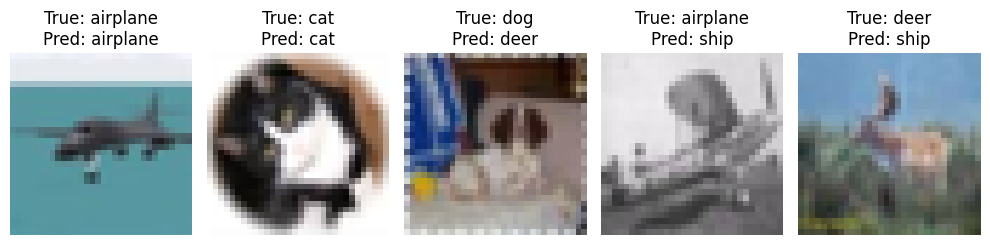

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

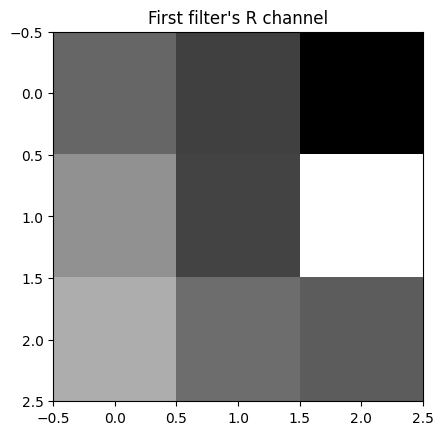

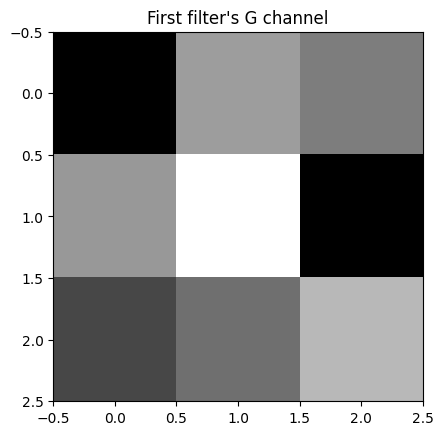

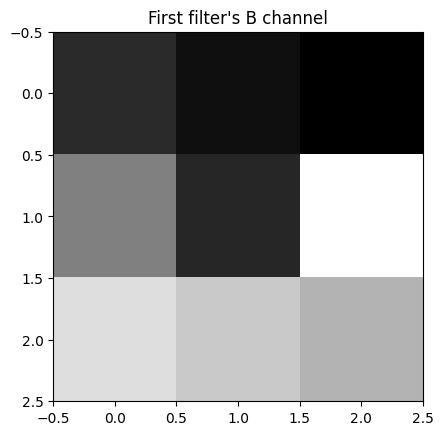

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##Nadam

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

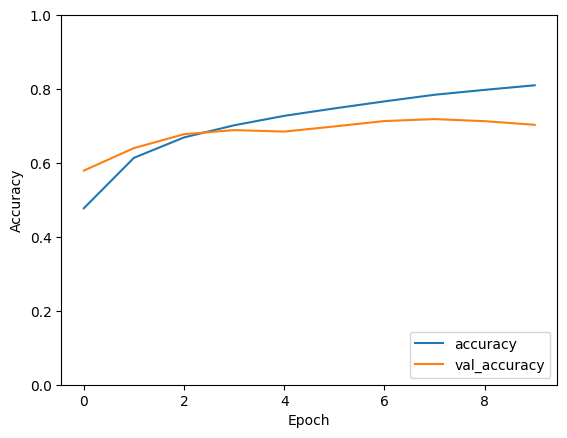

313/313 - 1s - loss: 0.9056 - accuracy: 0.7032 - 688ms/epoch - 2ms/step

Test accuracy: 0.7031999826431274


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 69ms/step


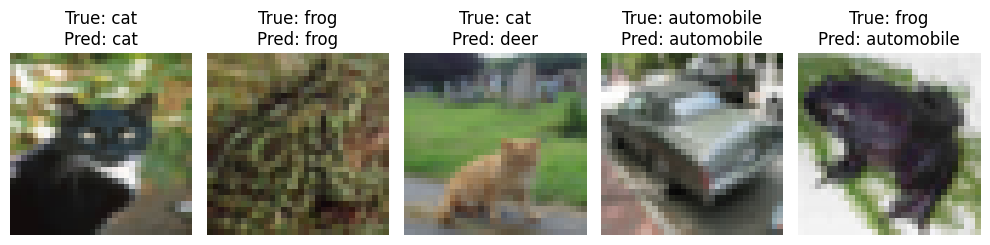

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

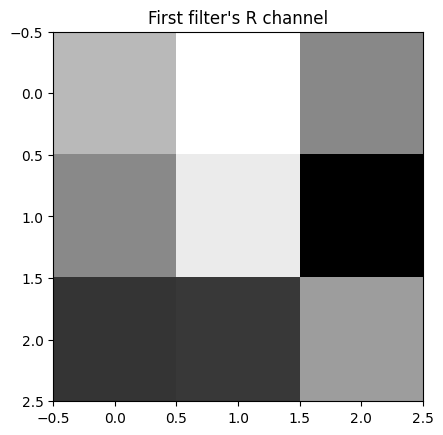

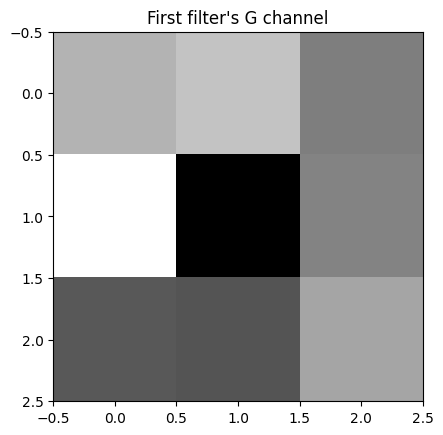

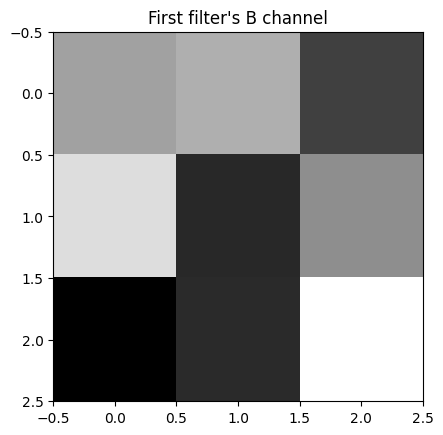

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

##Adamax

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

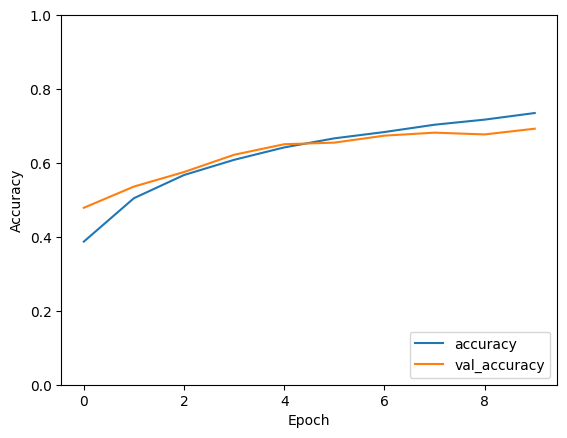

313/313 - 1s - loss: 0.8863 - accuracy: 0.6927 - 697ms/epoch - 2ms/step

Test accuracy: 0.6927000284194946


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 70ms/step


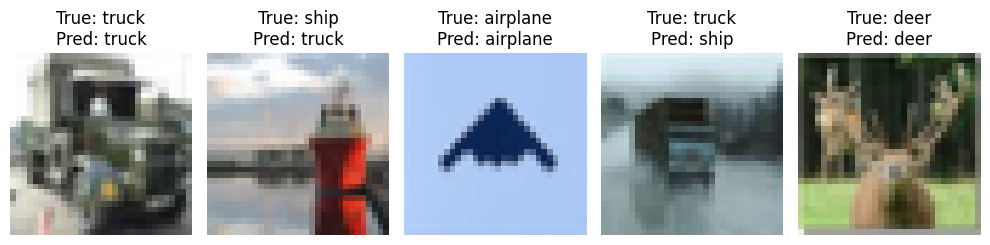

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

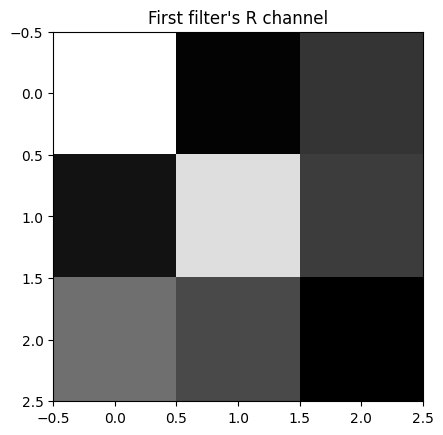

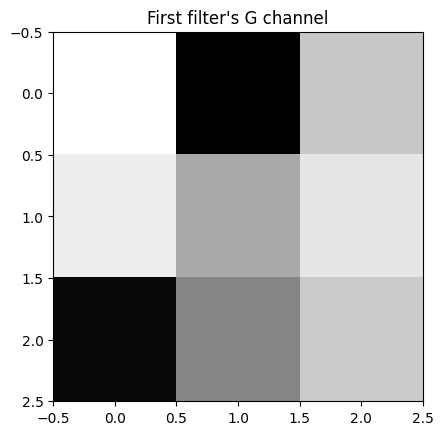

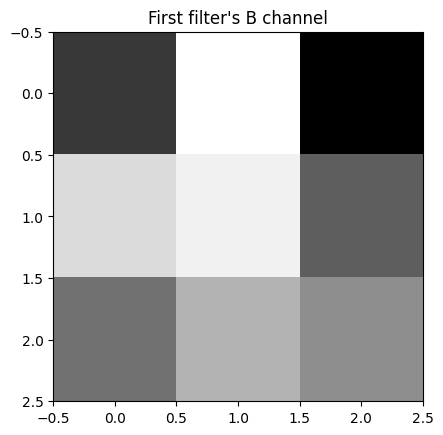

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

#2\. 최고의 조합

model 구성: 김상협  
activation function: 정지윤 > Leaky ReLU  
optimizer: 박병준 > NAdam  

최종 결과  
Test accuracy: 0.7651000022888184

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         7

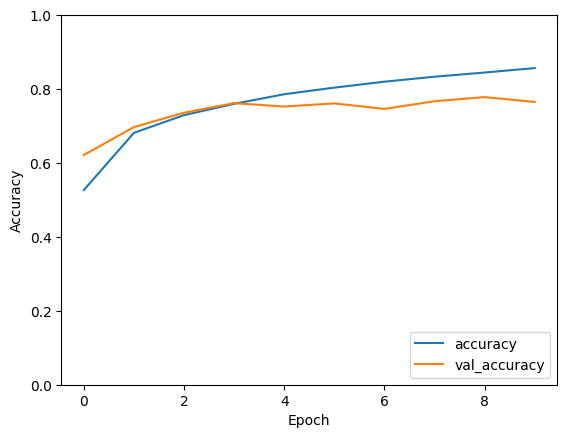

313/313 - 1s - loss: 0.7392 - accuracy: 0.7651 - 817ms/epoch - 3ms/step

Test accuracy: 0.7651000022888184


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(16, (3, 3), activation=tf.nn.leaky_relu, input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=tf.nn.leaky_relu),
    Flatten(),
    Dense(256,activation=tf.nn.leaky_relu),
    Dropout(0.4),
    Dense(64, activation=tf.nn.leaky_relu),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 21ms/step


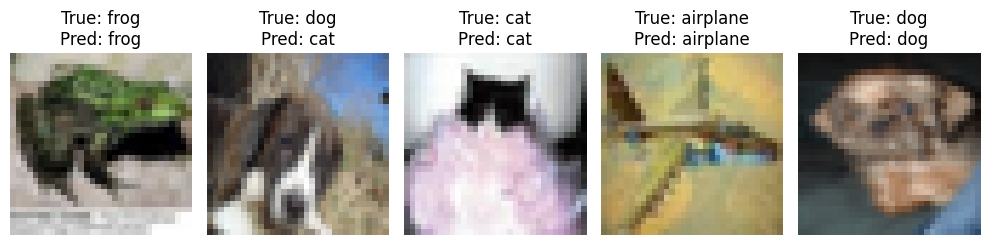

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

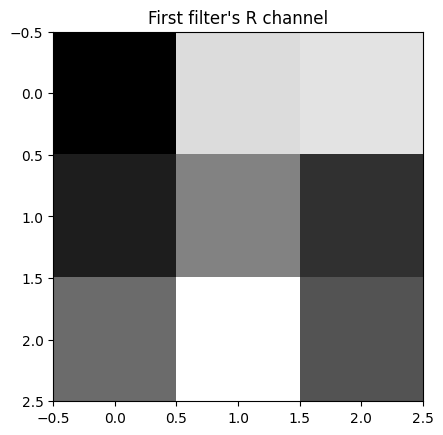

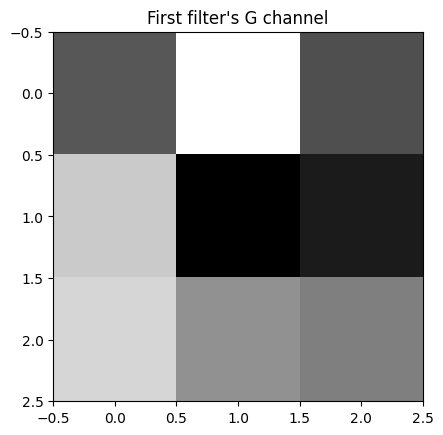

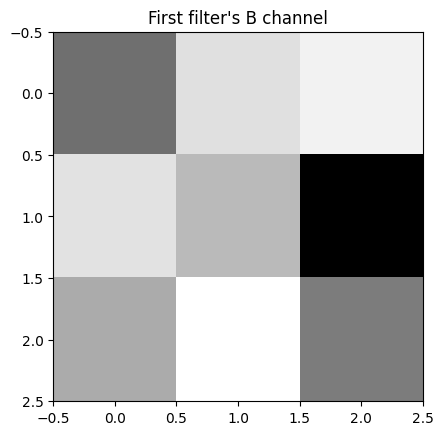

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()